In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import *
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm


In [10]:
def Find_Optimal_Cutoff(target, predicted):
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

def Statistics(target,predicted):
    threshold = Find_Optimal_Cutoff(target,predicted)
    threshold = threshold[0]
    i = 0
    TP,TN,FP,FN = 0,0,0,0
    for x in predicted:
        if x >=threshold and target[i] == 1:
            TP = TP + 1
        elif x < threshold and target[i] == 0:
            TN = TN + 1
        elif x >= threshold and target[i] == 0:
            FP = FP + 1
        else:
            FN = FN + 1
        i += 1
    testacc = (TP+TN)/i
    print("Testing accuracy:",testacc)
    spec = TN/(TN+FP)
    sens = TP/(TP+FN)
    print("Specificity:",spec)
    print("Sensitivity:",sens)
    return testacc,spec,sens

In [3]:
yt1 = r"../biomarkers/Comp_FAIM3dPLAC8_y.csv.gz"
pd1 = r"../biomarkers/Comp_FAIM3dPLAC8.csv.gz"

samplesdf = pd.DataFrame()
for df in  pd.read_csv(yt1,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
yt_1 = samplesdf.to_numpy()

samplesdf = pd.DataFrame()
for df in  pd.read_csv(pd1,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
pd_1 = samplesdf.to_numpy()

fpr, tpr, _ = roc_curve(yt_1,pd_1)
precision, recall, _ = precision_recall_curve(yt_1,pd_1)
roc_auc = auc(fpr,tpr)
prc_auc = auc(recall,precision)

In [11]:
Statistics(yt_1,pd_1)

Testing accuracy: 0.5368871569411138
Specificity: 0.9185611771090876
Sensitivity: 0.06599211368201771


(0.5368871569411138, 0.9185611771090876, 0.06599211368201771)

In [13]:
yt2 = r"../biomarkers/Comp_FAIM3-PLAC8_y.csv.gz"
pd2 = r"../biomarkers/Comp_FAIM3-PLAC8.csv.gz"

samplesdf = pd.DataFrame()
for df in  pd.read_csv(yt2,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
yt_2 = samplesdf.to_numpy()

samplesdf = pd.DataFrame()
for df in  pd.read_csv(pd2,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
pd_2 = samplesdf.to_numpy()

fpr2, tpr2, _ = roc_curve(yt_2,pd_2)
precision2, recall2, _ = precision_recall_curve(yt_2,pd_2)
roc_auc2 = auc(fpr2,tpr2)
prc_auc2 = auc(recall2,precision2)

In [14]:
Statistics(yt_2,pd_2)

Testing accuracy: 0.40049935948171056
Specificity: 0.40049046872629823
Sensitivity: 0.40051554696310615


(0.40049935948171056, 0.40049046872629823, 0.40051554696310615)

In [15]:
yt3 = r"../biomarkers/Comp_SeptiCyte1_y.csv.gz"
pd3 = r"../biomarkers/Comp_SeptiCyte1.csv.gz"

samplesdf = pd.DataFrame()
for df in  pd.read_csv(yt3,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
yt_3 = samplesdf.to_numpy()

samplesdf = pd.DataFrame()
for df in  pd.read_csv(pd3,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
pd_3 = samplesdf.to_numpy()

fpr3, tpr3, _ = roc_curve(yt_3,pd_3)
precision3, recall3, _ = precision_recall_curve(yt_3,pd_3)
roc_auc3 = auc(fpr3,tpr3)
prc_auc3 = auc(recall3,precision3)

In [16]:
Statistics(yt_3,pd_3)

Testing accuracy: 0.6230366492146597
Specificity: 0.7631578947368421
Sensitivity: 0.4155844155844156


(0.6230366492146597, 0.7631578947368421, 0.4155844155844156)

In [17]:
yt4 = r"../biomarkers/Comp_SeptiCyte2_y.csv.gz"
pd4 = r"../biomarkers/Comp_SeptiCyte2.csv.gz"

samplesdf = pd.DataFrame()
for df in  pd.read_csv(yt4,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
yt_4 = samplesdf.to_numpy()

samplesdf = pd.DataFrame()
for df in  pd.read_csv(pd4,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
pd_4 = samplesdf.to_numpy()

fpr4, tpr4, _ = roc_curve(yt_4,pd_4)
precision4, recall4, _ = precision_recall_curve(yt_4,pd_4)
roc_auc4 = auc(fpr4,tpr4)
prc_auc4 = auc(recall4,precision4)

In [18]:
Statistics(yt_4,pd_4)

Testing accuracy: 0.5865434042935124
Specificity: 0.5870329170248269
Sensitivity: 0.5856521438928399


(0.5865434042935124, 0.5870329170248269, 0.5856521438928399)

In [19]:
yt5 = r"../biomarkers/Comp_SNIP1_y.csv.gz"
pd5 = r"../biomarkers/Comp_SNIP1.csv.gz"

samplesdf = pd.DataFrame()
for df in  pd.read_csv(yt5,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
yt_5 = samplesdf.to_numpy()

samplesdf = pd.DataFrame()
for df in  pd.read_csv(pd5,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
pd_5 = samplesdf.to_numpy()

fpr5, tpr5, _ = roc_curve(yt_5,pd_5)
precision5, recall5, _ = precision_recall_curve(yt_5,pd_5)
roc_auc5 = auc(fpr5,tpr5)
prc_auc5 = auc(recall5,precision5)

In [20]:
Statistics(yt_5,pd_5)

Testing accuracy: 0.554056754596323
Specificity: 0.9470240607851415
Sensitivity: 0.06922848002380776


(0.554056754596323, 0.9470240607851415, 0.06922848002380776)

In [22]:
yt6 = r"../biomarkers/Comp_SNIP2_y.csv.gz"
pd6 = r"../biomarkers/Comp_SNIP2.csv.gz"

samplesdf = pd.DataFrame()
for df in  pd.read_csv(yt6,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
yt_6 = samplesdf.to_numpy()

samplesdf = pd.DataFrame()
for df in  pd.read_csv(pd6,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
pd_6 = samplesdf.to_numpy()

fpr6, tpr6, _ = roc_curve(yt_6,pd_6)
precision6, recall6, _ = precision_recall_curve(yt_6,pd_6)
roc_auc6 = auc(fpr6,tpr6)
prc_auc6 = auc(recall6,precision6)

In [23]:
Statistics(yt_6,pd_6)

Testing accuracy: 0.40749202411938934
Specificity: 0.40749355311725743
Sensitivity: 0.4074892402586941


(0.40749202411938934, 0.40749355311725743, 0.4074892402586941)

In [25]:
yt7 = r"../biomarkers/capsnet_y.csv.gz"
pd7 = r"../biomarkers/capsnet.csv.gz"

samplesdf = pd.DataFrame()
for df in  pd.read_csv(yt7,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
yt_7 = samplesdf.to_numpy()

samplesdf = pd.DataFrame()
for df in  pd.read_csv(pd7,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
pd_7 = samplesdf.to_numpy()

fpr7, tpr7, _ = roc_curve(yt_7,pd_7)
precision7, recall7, _ = precision_recall_curve(yt_7,pd_7)
roc_auc7 = auc(fpr7,tpr7)
prc_auc7 = auc(recall7,precision7)

In [26]:
Statistics(yt_7,pd_7)

Testing accuracy: 0.856506447831184
Specificity: 0.8563829787234043
Sensitivity: 0.8566450970632156


(0.856506447831184, 0.8563829787234043, 0.8566450970632156)

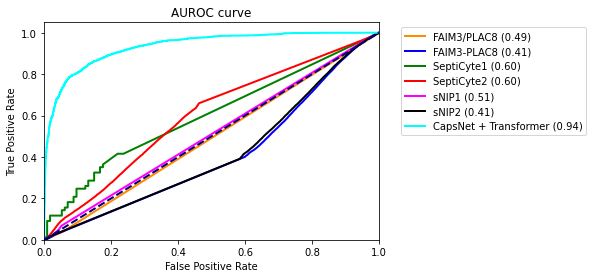

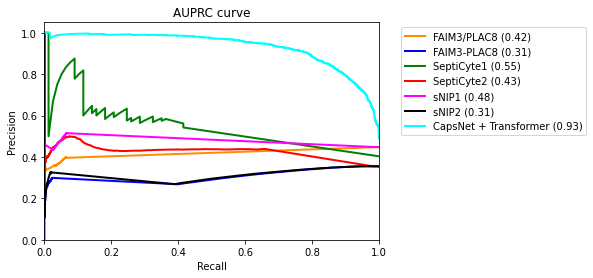

In [14]:
lw = 2
plt.plot(fpr,tpr, color='darkorange',
         lw=lw, label='FAIM3/PLAC8 (%0.2f)' % roc_auc)
plt.plot(fpr2,tpr2, color='blue',
         lw=lw, label='FAIM3-PLAC8 (%0.2f)' % roc_auc2)
plt.plot(fpr3,tpr3, color='green',
         lw=lw, label='SeptiCyte1 (%0.2f)' % roc_auc3)
plt.plot(fpr4,tpr4, color='red',
         lw=lw, label='SeptiCyte2 (%0.2f)' % roc_auc4)
plt.plot(fpr5,tpr5, color='magenta',
         lw=lw, label='sNIP1 (%0.2f)' % roc_auc5)
plt.plot(fpr6,tpr6, color='black',
         lw=lw, label='sNIP2 (%0.2f)' % roc_auc6)
plt.plot(fpr7,tpr7, color='cyan',
         lw=lw, label='CapsNet + Transformer (%0.2f)' % roc_auc7)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC curve')
plt.legend(loc="upper left",bbox_to_anchor=(1.05, 1))
plt.show()

plt.plot(recall,precision, color='darkorange',
         lw=lw, label='FAIM3/PLAC8 (%0.2f)' % prc_auc)
plt.plot(recall2,precision2, color='blue',
         lw=lw, label='FAIM3-PLAC8 (%0.2f)' % prc_auc2)
plt.plot(recall3,precision3, color='green',
         lw=lw, label='SeptiCyte1 (%0.2f)' % prc_auc3)
plt.plot(recall4,precision4, color='red',
         lw=lw, label='SeptiCyte2 (%0.2f)' % prc_auc4)
plt.plot(recall5,precision5, color='magenta',
         lw=lw, label='sNIP1 (%0.2f)' % prc_auc5)
plt.plot(recall6,precision6, color='black',
         lw=lw, label='sNIP2 (%0.2f)' % prc_auc6)
plt.plot(recall7,precision7, color='cyan',
         lw=lw, label='CapsNet + Transformer (%0.2f)' % prc_auc7)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('AUPRC curve')
plt.legend(loc="upper left",bbox_to_anchor=(1.05, 1))
plt.show()